In [1]:
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [6]:
class model:
    def __init__(self, path):
        self.model = load_model(path, compile=False)

    def invert_image(self, image: Image.Image) -> Image.Image:
        img_array = np.array(image)
        inverted_array = 255 - img_array  # invert the colors
        inverted_image = Image.fromarray(inverted_array)
        return inverted_image

    def predict_image(self, image: Image.Image) -> Image.Image:     # TESTED
        img_array= np.array(image)

        # my model takes input shape ( 128, 128, 3)
        org_resized = Image.fromarray(img_array).resize((128, 128)) # using pil to resize the image
        
        # plt.imshow(img_resized)
        # plt.show()

        img_resized = np.array(org_resized).astype(np.float32) / 255.0
        img_resized = np.expand_dims(img_resized, axis=0) # shape (1, 128, 128, 3)) as it takes batch of images

        prediction = self.model.predict(img_resized)
        prediction = prediction.squeeze() 
        prediction = (prediction > 0.5).astype(np.uint8)

        return org_resized, Image.fromarray((prediction * 255).astype(np.uint8))
MODEL= model(path= "./model.keras")

In [ ]:
# f_array = (np.array(f_img, dtype=np.float32) / 255.0).astype(np.float32)  # normalizing feature images to [0, 1]
# l_array = (np.array(l_img, dtype=np.float32) / 255.0 > 0.5).astype(np.uint8)  # converting to binary (0 and 1)

# data_xx[i, :, :, :] = f_array.astype(np.float32)  # adding the original image
# data_yy[i, :, :, 0] = l_array.astype(np.uint8)  # adding the original mask

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
<class 'PIL.Image.Image'> <class 'PIL.Image.Image'>


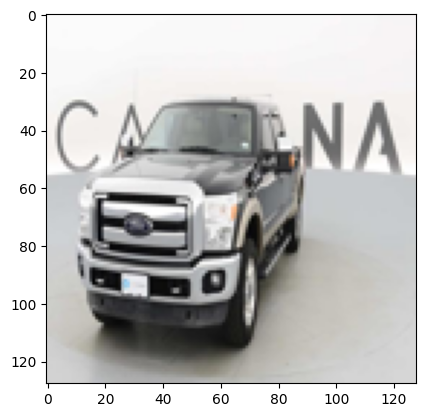

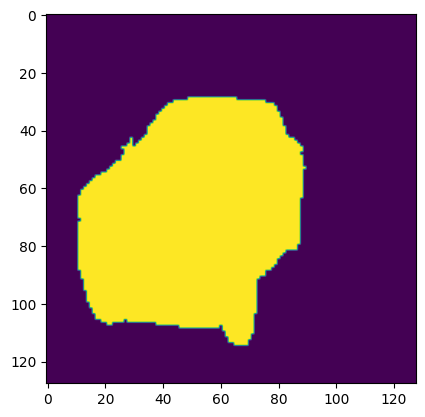

In [16]:
img= Image.open("./temp.jpg")
org, pred= MODEL.predict_image(img)
print(type(org), type(pred))
plt.imshow(org)
plt.show()
plt.imshow(pred)
plt.show()